# AML - Data Exploration 

Name: Phon Lihour, Sim Liheng, Ly Hor

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from PIL import Image
from scipy.stats import skew
from matplotlib.transforms import Bbox

In [2]:
# Load dataset
file_path = "SAML-D.csv"  
df = pd.read_csv(file_path)

## Data Overview

In [3]:
df.duplicated().sum() 


0

In [4]:
print("\nShowing the number of rows and columns of the dataset:")
df.shape


Showing the number of rows and columns of the dataset:


(1048575, 12)

In [5]:
print("\nShowing first 5rows of the dataset:")
df.head()


Showing first 5rows of the dataset:


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,07/10/2022,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,07/10/2022,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,07/10/2022,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,07/10/2022,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,07/10/2022,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [6]:
print("\nSummary Statistics of Dataset:")
df.describe()


Summary Statistics of Dataset:


,Sender_account,Receiver_account,Amount,Is_laundering
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.007747e+09,5.032774e+09,8.707645e+03,9.117135e-04
std,2.889940e+09,2.882542e+09,2.444582e+04,3.018084e-02
min,9.217200e+04,4.823800e+04,5.190000e+00,0.000000e+00
25%,2.501276e+09,2.528695e+09,2.114535e+03,0.000000e+00
50%,4.999680e+09,5.042954e+09,6.104870e+03,0.000000e+00
75%,7.509491e+09,7.543159e+09,1.034893e+04,0.000000e+00
max,9.999913e+09,9.999971e+09,6.213932e+06,1.000000e+00


## Missing Values Analysis

In [7]:
print("\nMissing Values in Dataset:\n")
print(df.isnull().sum())

print("\n\nNumber of invalid Amount entries:\n")
print(df['Amount'].isnull().sum())


Missing Values in Dataset:

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64


Number of invalid Amount entries:

0


In [8]:
print("\nQuick showing all data Information such as Data Type Rows or Columns:\n")
df.shape
df.info()


Quick showing all data Information such as Data Type Rows or Columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Time                    1048575 non-null  object 
 1   Date                    1048575 non-null  object 
 2   Sender_account          1048575 non-null  int64  
 3   Receiver_account        1048575 non-null  int64  
 4   Amount                  1048575 non-null  float64
 5   Payment_currency        1048575 non-null  object 
 6   Received_currency       1048575 non-null  object 
 7   Sender_bank_location    1048575 non-null  object 
 8   Receiver_bank_location  1048575 non-null  object 
 9   Payment_type            1048575 non-null  object 
 10  Is_laundering           1048575 non-null  int64  
 11  Laundering_type         1048575 non-null  object 
dtypes: float64(1), int64(3), object(8)
memor

In [9]:

transactions_per_payment_type = df['Payment_type'].value_counts()


laundering_transactions_per_payment_type = df[df['Is_laundering'] == 1].groupby('Payment_type').size()

transactions_per_payment_type, laundering_transactions_per_payment_type

(Payment_type
 ACH                222636
 Credit card        222166
 Cheque             221939
 Debit card         221781
 Cross-border       101322
 Cash Withdrawal     33577
 Cash Deposit        25154
 Name: count, dtype: int64,
 Payment_type
 ACH                117
 Cash Deposit       130
 Cash Withdrawal    122
 Cheque             115
 Credit card        133
 Cross-border       229
 Debit card         110
 dtype: int64)

In [10]:
total_amount_pivot = pd.pivot_table(df, index=["Payment_type"], values='Amount', aggfunc=np.sum)
laundering_count_pivot = df[df['Is_laundering'] == 1].groupby('Payment_type').size().to_frame('Laundering_Count')
normal_count_pivot = df[df['Is_laundering'] == 0].groupby('Payment_type').size().to_frame('Normal_Count')

combined_pivot = total_amount_pivot.join([laundering_count_pivot, normal_count_pivot], how='outer')
combined_pivot = combined_pivot.fillna(0)

cm = sns.light_palette("blue", as_cmap=True)
styled_combined_pivot = combined_pivot.style.background_gradient(cmap=cm)

styled_combined_pivot

/var/folders/1j/g0dbmj351815t2_1w_xl3jrm0000gn/T/ipykernel_3180/1828936050.py:1: FutureWarning: The provided callable <function sum at 0x109d74c10> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_amount_pivot = pd.pivot_table(df, index=["Payment_type"], values='Amount', aggfunc=np.sum)


,Amount,Laundering_Count,Normal_Count
Payment_type,,,
ACH,2002210134.634332,117,222519
Cash Deposit,54275822.010000,130,25024
Cash Withdrawal,5177920.840000,122,33455
Cheque,2017822215.628851,115,221824
Credit card,1997301064.447282,133,222033
Cross-border,1014681575.101712,229,101093
Debit card,2039150615.884231,110,221671


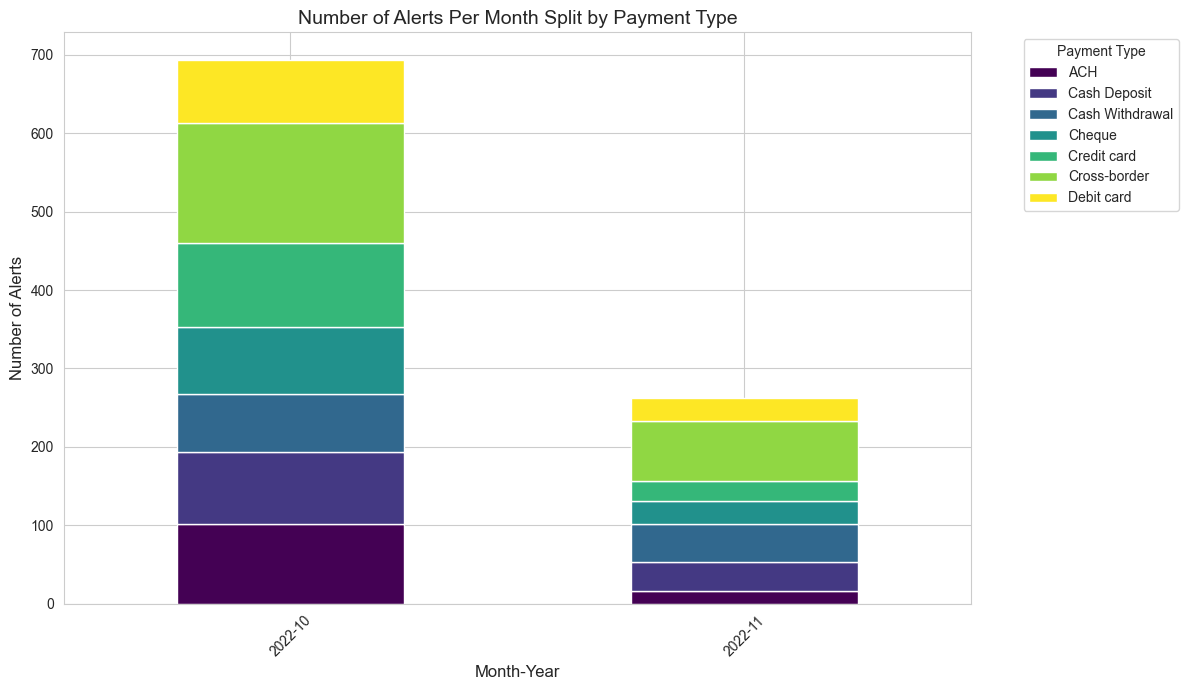

In [11]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
grouped_data = df.groupby(['Date', 'Payment_type']).agg({'Is_laundering': 'sum'}).reset_index()
grouped_data['Month_Year'] = grouped_data['Date'].dt.to_period('M')
monthly_alerts = grouped_data.groupby(['Month_Year', 'Payment_type']).agg({'Is_laundering': 'sum'}).reset_index()

pivot_data = monthly_alerts.pivot(index='Month_Year', columns='Payment_type', values='Is_laundering')

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))
pivot_data.plot(kind='bar', ax=ax, stacked=True, colormap='viridis')
pivot_data = monthly_alerts.pivot(index='Month_Year', columns='Payment_type', values='Is_laundering')

plt.title('Number of Alerts Per Month Split by Payment Type', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Alerts', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
laundering_stats = df[df['Is_laundering'] == 1]['Amount'].agg(['max', 'mean', 'min'])

normal_stats = df[df['Is_laundering'] == 0]['Amount'].agg(['max', 'mean', 'min'])

print("Laundering Transactions Stats:\n", laundering_stats)
print("\nNormal Transactions Stats:\n", normal_stats)

Laundering Transactions Stats:
 max     6.213932e+06
mean    3.657156e+04
min     2.477000e+01
Name: Amount, dtype: float64

Normal Transactions Stats:
 max     999946.470000
mean      8682.218377
min          5.190000
Name: Amount, dtype: float64


## High Value Transactions

In [13]:
high_value_threshold = df['Amount'].quantile(0.99)  # Top 1% transactions
high_value_transactions = df[df['Amount'] > high_value_threshold]

print("\nSuspicious Transactions (Top 1% highest values):\n")
high_value_transactions


Suspicious Transactions (Top 1% highest values):



,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
586,10:57:14,2022-10-07,5310672783,4729254795,88014.57,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Plus_Mutual
1001,11:11:47,2022-10-07,2831014523,9689826880,60840.88,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Plus_Mutual
1012,11:12:13,2022-10-07,4305368854,8126009332,47379.67,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Mutual
1026,11:13:00,2022-10-07,4244137850,6491106472,998453.63,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_single_large
1112,11:15:46,2022-10-07,4535762652,4276741351,44824.58,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
...,...,...,...,...,...,...,...,...,...,...,...,...
1048454,09:16:57,2022-11-12,8358905380,1025808777,44291.63,UK pounds,Euro,UK,Germany,Cross-border,0,Normal_Small_Fan_Out
1048504,09:18:35,2022-11-12,2986696745,6388672409,572829.23,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_single_large
1048524,09:19:27,2022-11-12,4297173659,1292069080,71126.18,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Plus_Mutual
1048547,09:20:20,2022-11-12,4632702938,845999877,768149.82,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Plus_Mutual


## Transaction Amount Analysis

In [14]:
print("\nTransaction Amount Analysis:\n")
print(f"Total Transaction Volume: £{df['Amount'].sum():,.2f}")
print(f"Average Transaction Amount: £{df['Amount'].mean():,.2f}")
print(f"Median Transaction Amount: £{df['Amount'].median():,.2f}")


Transaction Amount Analysis:

Total Transaction Volume: £9,130,619,348.55
Average Transaction Amount: £8,707.65
Median Transaction Amount: £6,104.87


## Payment Type Currency Distribution

In [15]:
print("\nPayment Currency Distribution:\n")
print(df['Payment_currency'].value_counts())
    


Payment Currency Distribution:

Payment_currency
UK pounds          1005855
Euro                 11633
Swiss franc           3279
Yen                   3197
Turkish lira          3139
Dirham                3129
US dollar             2860
Naira                 2695
Indian rupee          2692
Pakistani rupee       2657
Moroccan dirham       2522
Albanian lek          2470
Mexican Peso          2447
Name: count, dtype: int64


In [16]:
print("\nSender Bank Location Distribution:\n")
print(df['Sender_bank_location'].value_counts())



Sender Bank Location Distribution:

Sender_bank_location
UK             1015115
Switzerland       2542
Japan             2416
Turkey            2338
UAE               2322
Spain             2313
USA               2102
France            1950
Nigeria           1923
India             1913
Pakistan          1906
Netherlands       1752
Morocco           1749
Austria           1698
Italy             1674
Albania           1664
Mexico            1628
Germany           1570
Name: count, dtype: int64


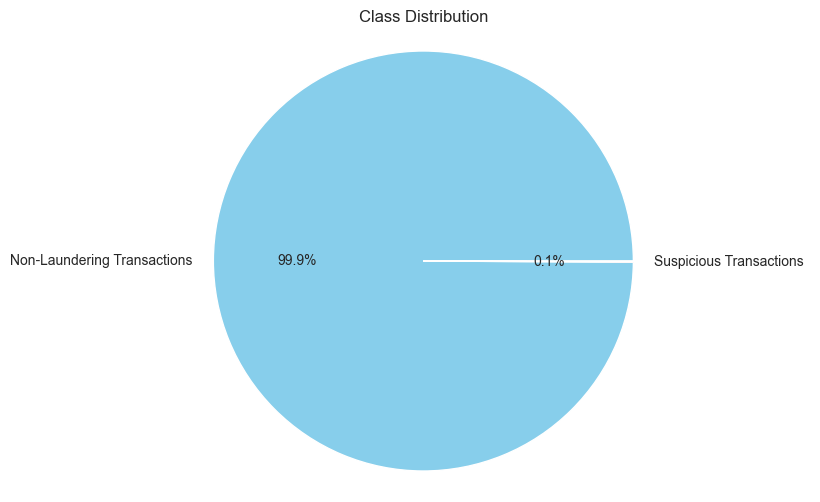

In [53]:
class_distribution = df['Is_laundering'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(class_distribution, labels=['Non-Laundering Transactions', 'Suspicious Transactions'], autopct='%1.1f%%', colors=['skyblue', 'red'])

plt.title('Class Distribution')
plt.axis('equal')

plt.show()



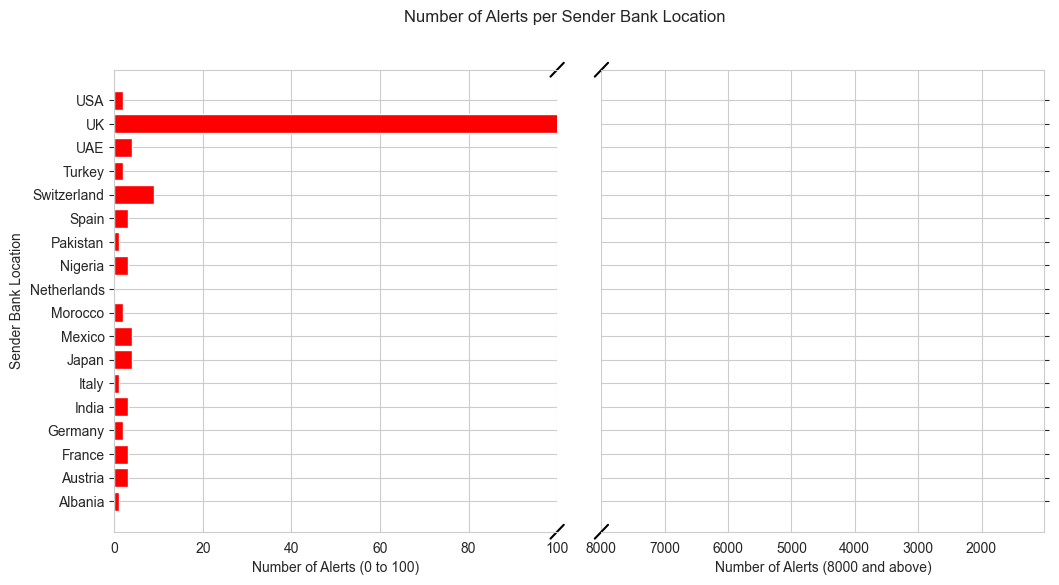

In [17]:
alerts_per_location = df.groupby('Sender_bank_location')['Is_laundering'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
fig.subplots_adjust(wspace=0.1)

ax1.barh(alerts_per_location['Sender_bank_location'], alerts_per_location['Is_laundering'], color='red')
ax2.barh(alerts_per_location['Sender_bank_location'], alerts_per_location['Is_laundering'], color='red')

ax1.set_xlim(0, 100)  # Set the left subplot values
ax2.set_xlim(8000, max(alerts_per_location['Is_laundering']) + 100)  # Set the right subplot values

fig.suptitle('Number of Alerts per Sender Bank Location')

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()
ax2.set_yticks([])

d = .015  # Size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax1.set_xlabel('Number of Alerts (0 to 100)')
ax2.set_xlabel('Number of Alerts (8000 and above)')
ax1.set_ylabel('Sender Bank Location')

ax1.set_yticks(range(len(alerts_per_location['Sender_bank_location'])))
ax1.set_yticklabels(alerts_per_location['Sender_bank_location'])

plt.show()

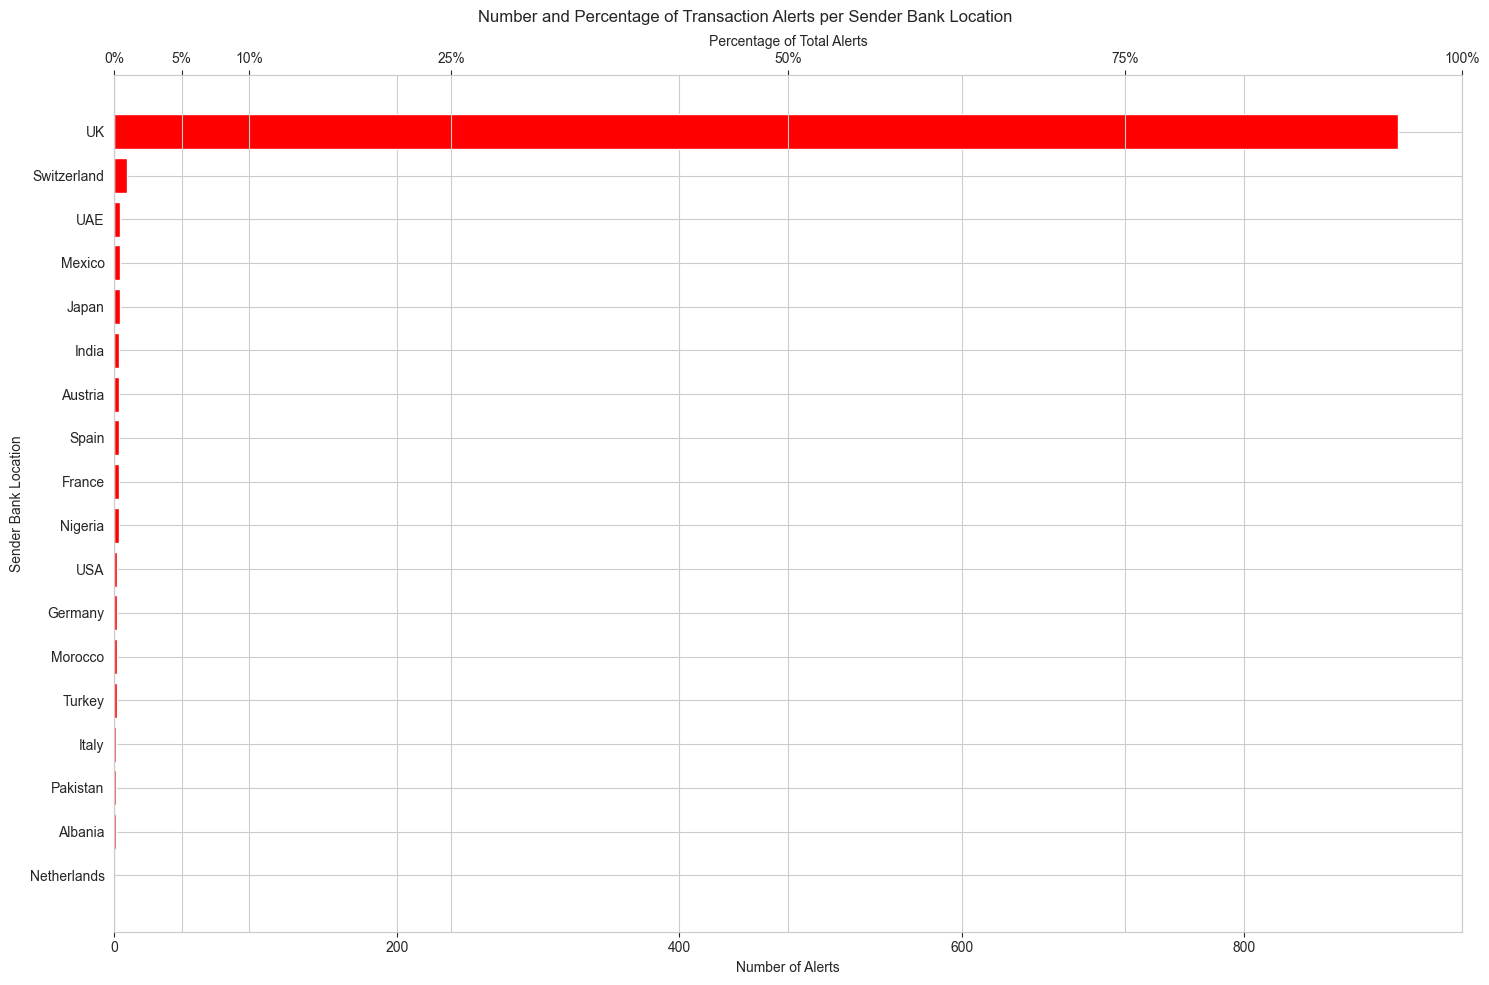

In [18]:
import matplotlib.pyplot as plt

# Prepare data
alerts_per_location = df.groupby('Sender_bank_location')['Is_laundering'].sum().reset_index()
alerts_per_location = alerts_per_location.sort_values('Is_laundering', ascending=True)

total_alerts = alerts_per_location['Is_laundering'].sum()
alerts_per_location['Percentage'] = (alerts_per_location['Is_laundering'] / total_alerts) * 100

# Set up figure and axes
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twiny()

# Plot horizontal bar chart on primary axis (number of alerts)
bars = ax1.barh(
    alerts_per_location['Sender_bank_location'], 
    alerts_per_location['Is_laundering'], 
    color='red'
)

# Set axis labels and title
ax1.set_xlabel("Number of Alerts")
ax2.set_xlabel("Percentage of Total Alerts")
ax1.set_ylabel("Sender Bank Location")
fig.suptitle("Number and Percentage of Transaction Alerts per Sender Bank Location")

# Set ticks for secondary axis (percentage)
def convert_to_percentage(x):
    return (x / total_alerts) * 100

def convert_to_count(p):
    return (p / 100) * total_alerts

ax2.set_xlim(convert_to_percentage(ax1.get_xlim()[0]), convert_to_percentage(ax1.get_xlim()[1]))
ax2.set_xticks([0, 5, 10, 25, 50, 75, 100])
ax2.set_xticklabels([f"{x:.0f}%" for x in ax2.get_xticks()])

plt.tight_layout()
plt.show()


In [19]:
print("\nReceiver Bank Location Distribution:\n")
print(df['Receiver_bank_location'].value_counts())



Receiver Bank Location Distribution:

Receiver_bank_location
UK             977789
Mexico           5981
Nigeria          5022
Albania          4877
Morocco          4462
France           4368
Germany          4247
Netherlands      4175
UAE              4043
USA              4030
Japan            4026
Switzerland      3920
Austria          3722
Spain            3703
Italy            3638
India            3588
Pakistan         3576
Turkey           3408
Name: count, dtype: int64


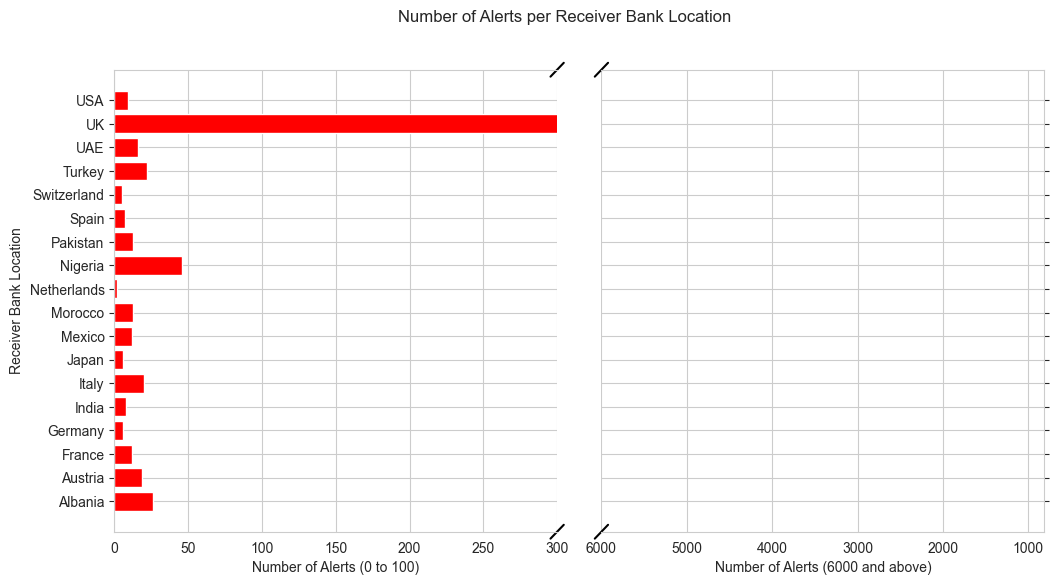

In [20]:
alerts_per_location = df.groupby('Receiver_bank_location')['Is_laundering'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
fig.subplots_adjust(wspace=0.1)  # Adjust the spacing between subplots

ax1.barh(alerts_per_location['Receiver_bank_location'], alerts_per_location['Is_laundering'], color='red')
ax2.barh(alerts_per_location['Receiver_bank_location'], alerts_per_location['Is_laundering'], color='red')

ax1.set_xlim(0, 300)  # Set the left subplot values
ax2.set_xlim(6000, max(alerts_per_location['Is_laundering']) + 100)  # Set the right subplot values

fig.suptitle('Number of Alerts per Receiver Bank Location')

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()
ax2.set_yticks([])

d = .015  # Size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax1.set_xlabel('Number of Alerts (0 to 100)')
ax2.set_xlabel('Number of Alerts (6000 and above)')
ax1.set_ylabel('Receiver Bank Location')

ax1.set_yticks(range(len(alerts_per_location['Receiver_bank_location'])))
ax1.set_yticklabels(alerts_per_location['Receiver_bank_location'])

plt.show()

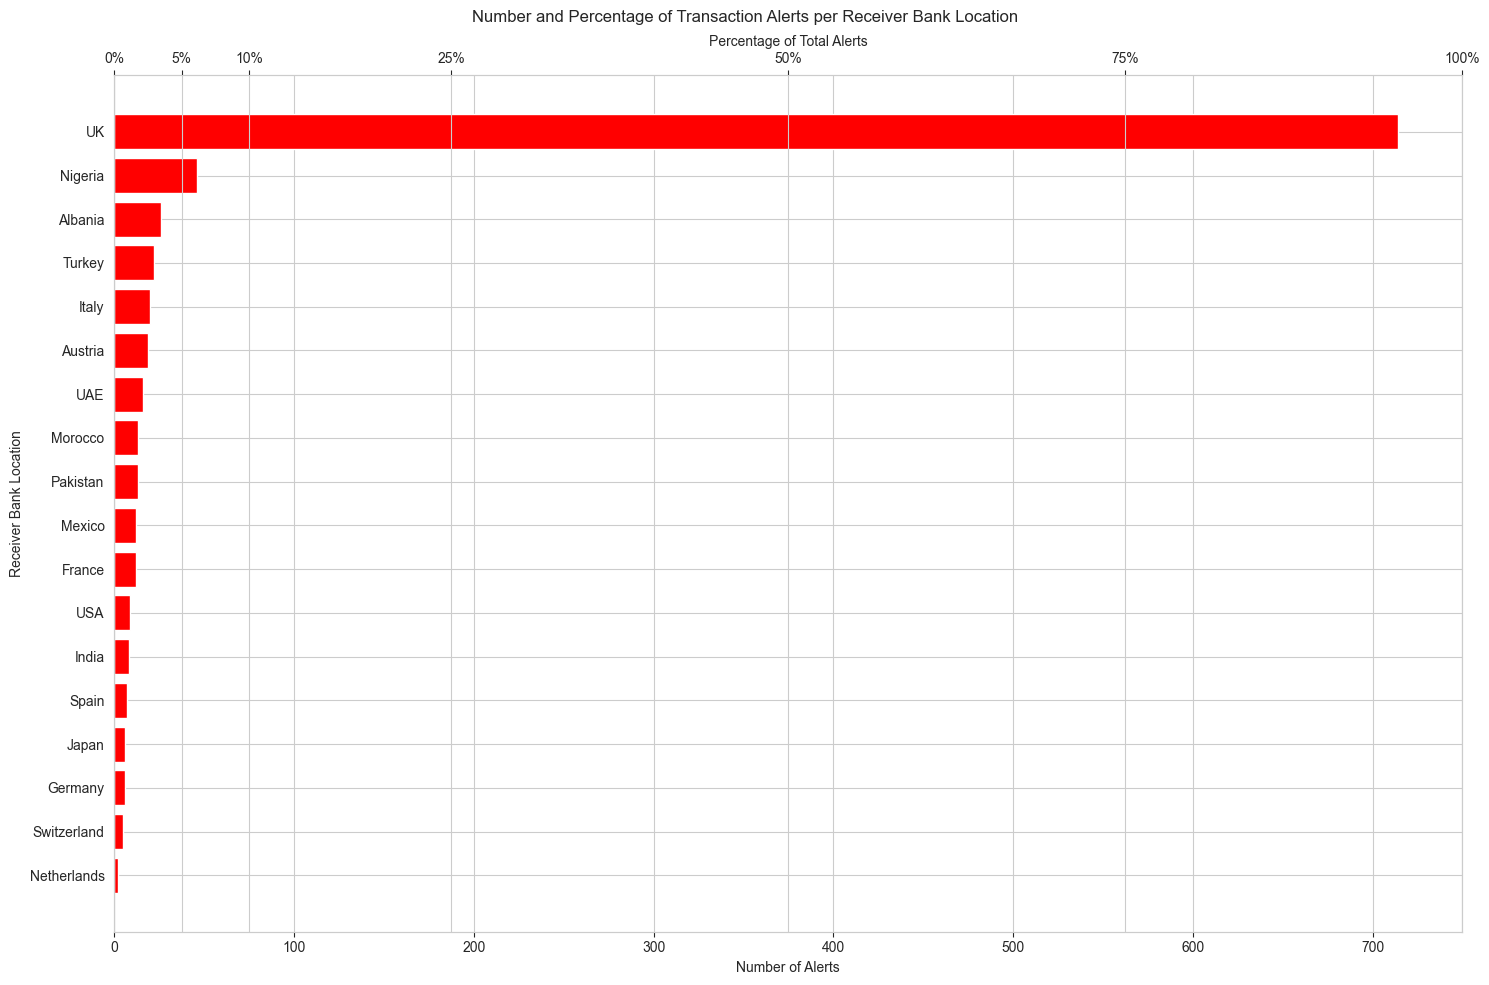

In [21]:
import matplotlib.pyplot as plt

# Prepare data
alerts_per_location = df.groupby('Receiver_bank_location')['Is_laundering'].sum().reset_index()
alerts_per_location = alerts_per_location.sort_values('Is_laundering', ascending=True)

total_alerts = alerts_per_location['Is_laundering'].sum()
alerts_per_location['Percentage'] = (alerts_per_location['Is_laundering'] / total_alerts) * 100

# Set up figure and axes
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twiny()

# Plot horizontal bar chart on primary axis (number of alerts)
bars = ax1.barh(
    alerts_per_location['Receiver_bank_location'], 
    alerts_per_location['Is_laundering'], 
    color='red'
)

# Set axis labels and title
ax1.set_xlabel("Number of Alerts")
ax2.set_xlabel("Percentage of Total Alerts")
ax1.set_ylabel("Receiver Bank Location")
fig.suptitle("Number and Percentage of Transaction Alerts per Receiver Bank Location")

# Set ticks for secondary axis (percentage)
def convert_to_percentage(x):
    return (x / total_alerts) * 100

def convert_to_count(p):
    return (p / 100) * total_alerts

ax2.set_xlim(convert_to_percentage(ax1.get_xlim()[0]), convert_to_percentage(ax1.get_xlim()[1]))
ax2.set_xticks([0, 5, 10, 25, 50, 75, 100])
ax2.set_xticklabels([f"{x:.0f}%" for x in ax2.get_xticks()])

plt.tight_layout()
plt.show()


## Fraud Detection 

In [22]:

# Print Potential Fraud Indicators (transactions flagged for laundering)
print("\nPotential Fraud Indicators:\n")
print("Transactions flagged for laundering:")
laundering_types = df[df['Is_laundering'] == 1]['Laundering_type'].value_counts()
print(laundering_types)




Potential Fraud Indicators:

Transactions flagged for laundering:
Laundering_type
Structuring             234
Cash_Withdrawal         122
Deposit-Send             98
Smurfing                 80
Layered_Fan_Out          78
Stacked Bipartite        62
Behavioural_Change_1     55
Fan_In                   37
Gather-Scatter           33
Layered_Fan_In           31
Single_large             29
Behavioural_Change_2     28
Bipartite                23
Cycle                    16
Fan_Out                  14
Scatter-Gather           11
Over-Invoicing            5
Name: count, dtype: int64


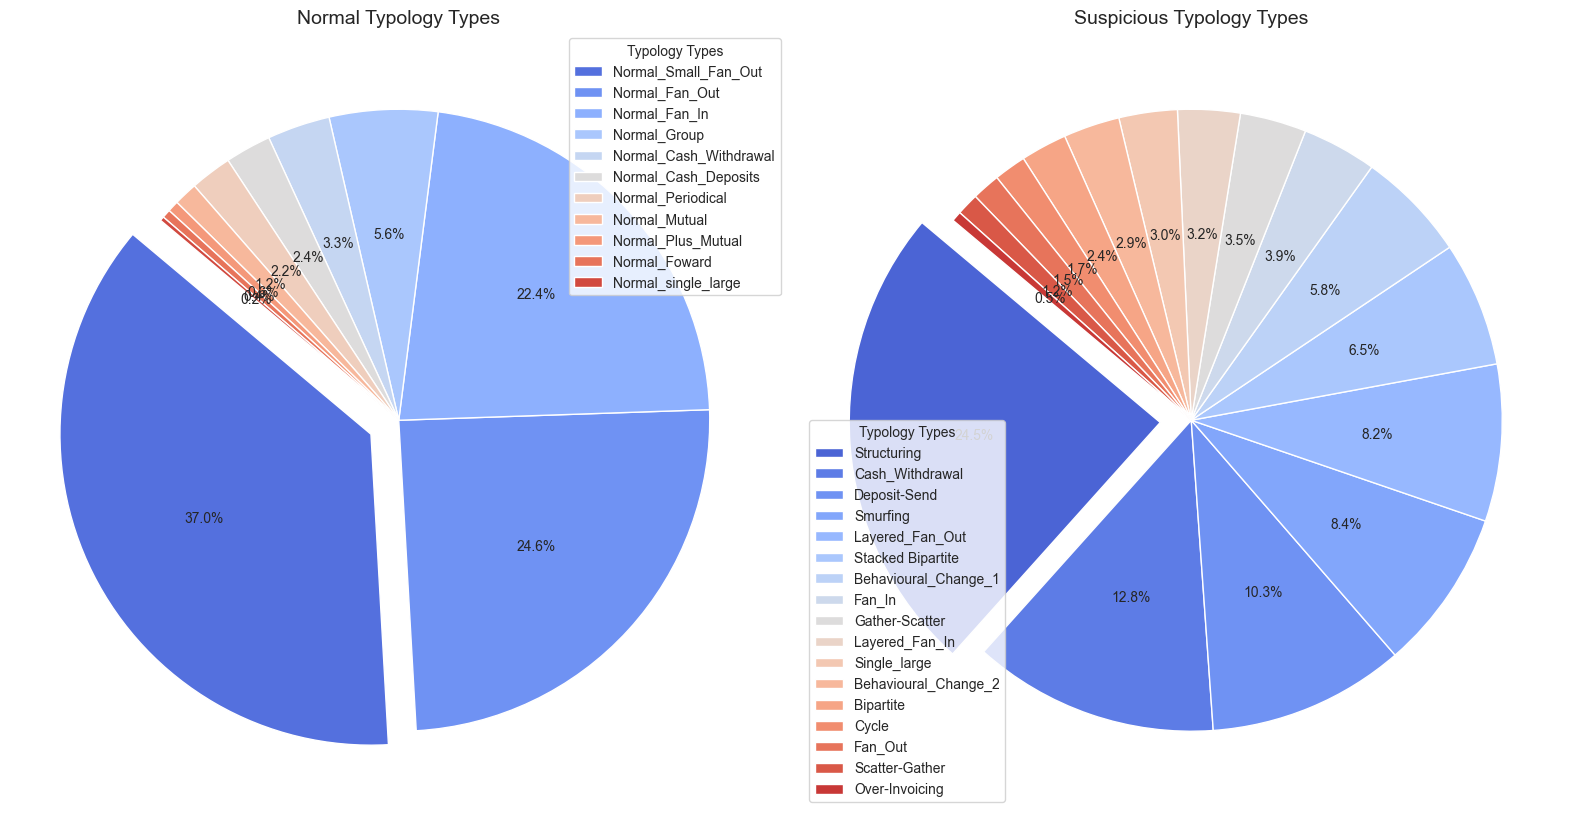

In [23]:
normal_data = df[df['Is_laundering'] == 0]['Laundering_type'].value_counts()
laundering_data = df[df['Is_laundering'] == 1]['Laundering_type'].value_counts()

# palette_normal = sns.color_palette("husl", len(normal_data))
palette_normal = sns.color_palette("coolwarm", len(normal_data))
palette_laundering = sns.color_palette("coolwarm", len(laundering_data))

fig, axs = plt.subplots(1, 2, figsize=(16, 10))

explode_normal = [0.1] + [0] * (len(normal_data) - 1)
explode_laundering = [0.1] + [0] * (len(laundering_data) - 1)

patches, texts, autotexts = axs[0].pie(normal_data, explode=explode_normal, autopct='%1.1f%%', colors=palette_normal, startangle=140)
axs[0].set_title('Normal Typology Types', fontsize=14)
axs[0].legend(patches, normal_data.index, loc='best', title="Typology Types", fontsize=10)

patches, texts, autotexts = axs[1].pie(laundering_data, explode=explode_laundering, autopct='%1.1f%%', colors=palette_laundering, startangle=140)
axs[1].set_title('Suspicious Typology Types', fontsize=14)
axs[1].legend(patches, laundering_data.index, loc='best', title="Typology Types", fontsize=10)

for text in texts + autotexts:
  text.set_fontsize(10)

plt.tight_layout()
plt.show()

## Feature Correlation

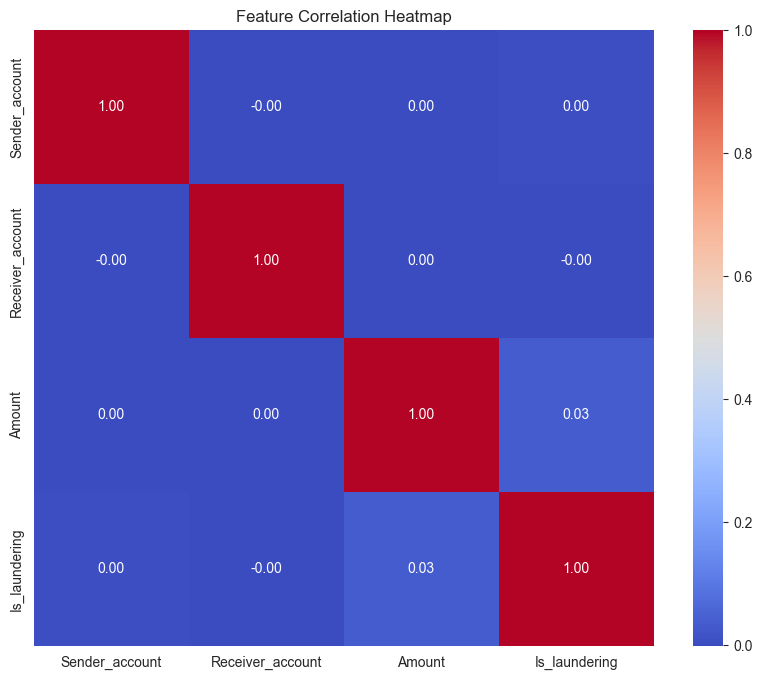


Full Correlation Matrix:

                  Sender_account  Receiver_account    Amount  Is_laundering
Sender_account          1.000000         -0.000779  0.000961       0.003103
Receiver_account       -0.000779          1.000000  0.000951      -0.001941
Amount                  0.000961          0.000951  1.000000       0.034432
Is_laundering           0.003103         -0.001941  0.034432       1.000000


Top 5 Strongest Correlations:

Amount          Is_laundering     0.034432
Is_laundering   Amount            0.034432
Sender_account  Is_laundering     0.003103
Is_laundering   Sender_account    0.003103
Sender_account  Amount            0.000961
dtype: float64


In [24]:
# Filter only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

print("\nFull Correlation Matrix:\n")
print(corr_matrix)

print("\n\nTop 5 Strongest Correlations:\n")
corr_pairs = corr_matrix.unstack()
sorted_corrs = corr_pairs[abs(corr_pairs) < 1].sort_values(kind="quicksort", ascending=False)
print(sorted_corrs[:5])

## Plot the Transaction Amount Distribution

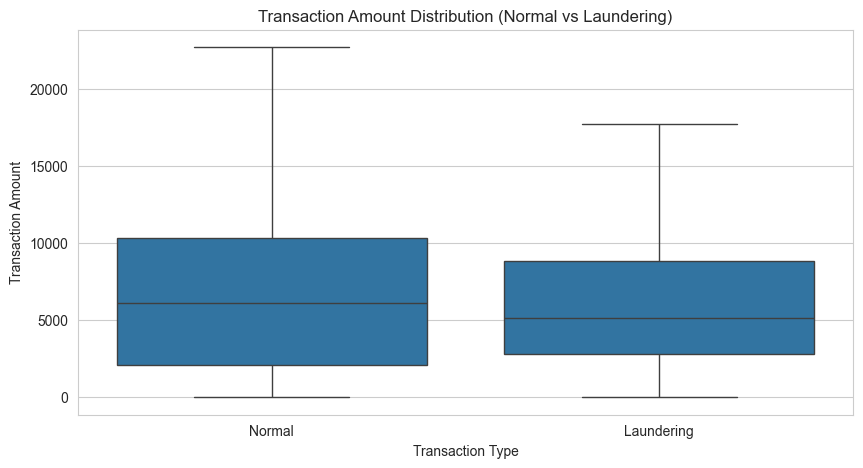

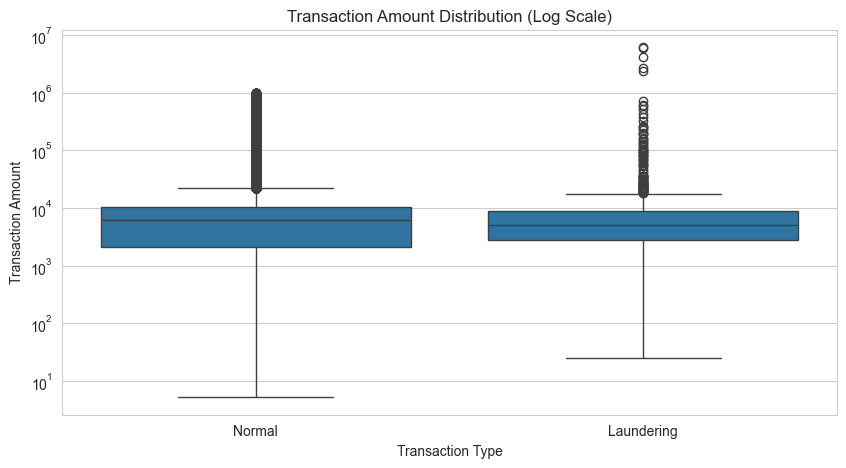

In [26]:
plt.figure(figsize=(10, 5))

sns.boxplot(x=df['Is_laundering'], y=df['Amount'], showfliers=False)
plt.xticks([0, 1], ['Normal', 'Laundering'])
plt.title("Transaction Amount Distribution (Normal vs Laundering)")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Is_laundering'], y=df['Amount'])
plt.xticks([0, 1], ['Normal', 'Laundering'])
plt.title("Transaction Amount Distribution (Log Scale)")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.yscale("log")  # Log scale helps separate extreme values
plt.show()




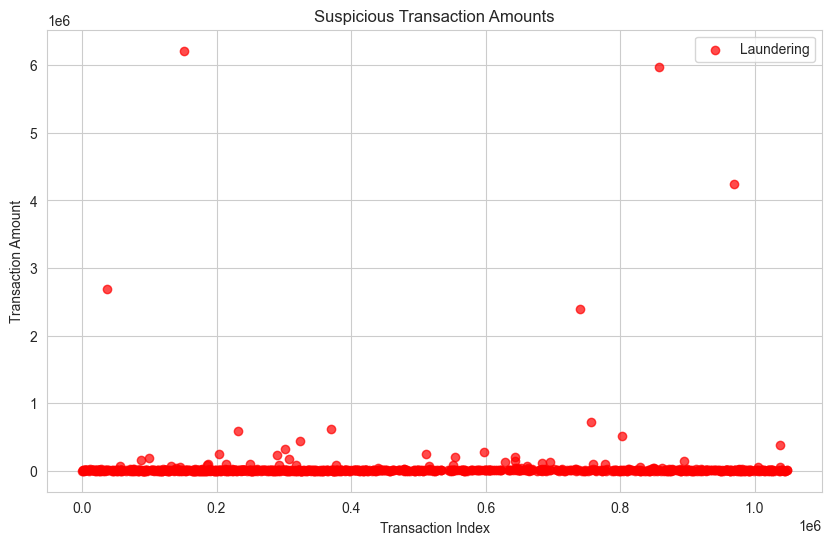

In [27]:
laundering_data = df[df['Is_laundering'] == 1]
non_laundering_data = df[df['Is_laundering'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(laundering_data.index, laundering_data['Amount'], color='red', label='Laundering', alpha=0.7)

plt.title('Suspicious Transaction Amounts')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 0, 'Number of Alerts')

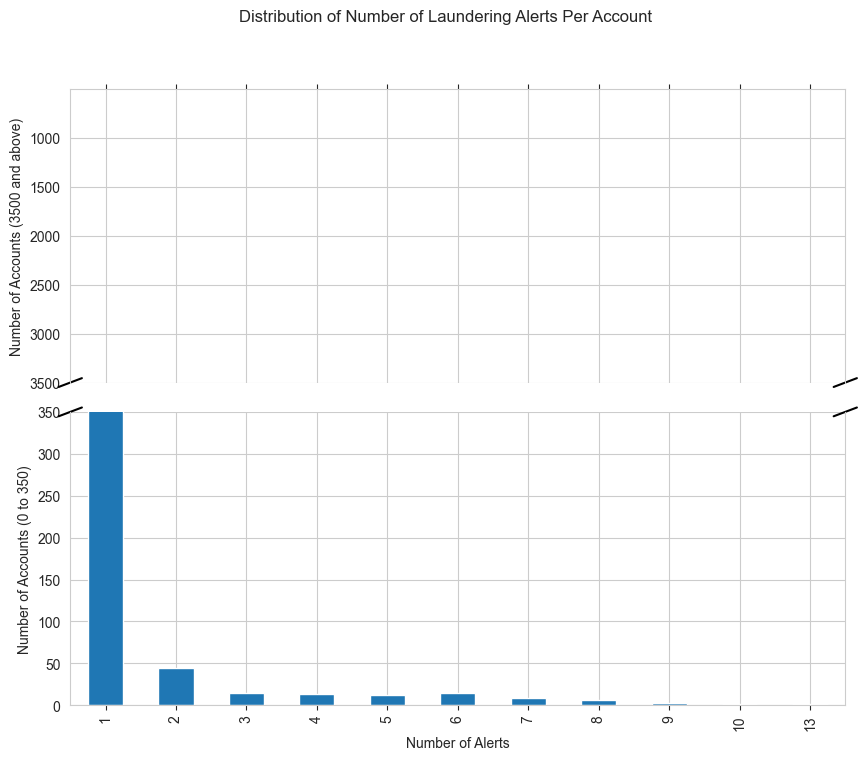

In [28]:
laundering_df = df[df['Is_laundering'] == 1]

account_alert_counts = laundering_df.groupby('Sender_account').size()
alert_distribution = account_alert_counts.value_counts()
alert_distribution = alert_distribution.sort_index()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
fig.subplots_adjust(hspace=0.1)

alert_distribution.plot(kind='bar', ax=ax1)
alert_distribution.plot(kind='bar', ax=ax2)

fig.suptitle('Distribution of Number of Laundering Alerts Per Account')

ax1.set_ylim(3500, alert_distribution.max()+50)
ax2.set_ylim(0, 350)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015  # diagonal lines size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

ax2.set_ylabel('Number of Accounts (0 to 350)')
ax1.set_ylabel('Number of Accounts (3500 and above)')
ax2.set_xlabel('Number of Alerts')

Original Skewness: 53.46067770907625
Log-Transformed Skewness: -1.0106522237591442


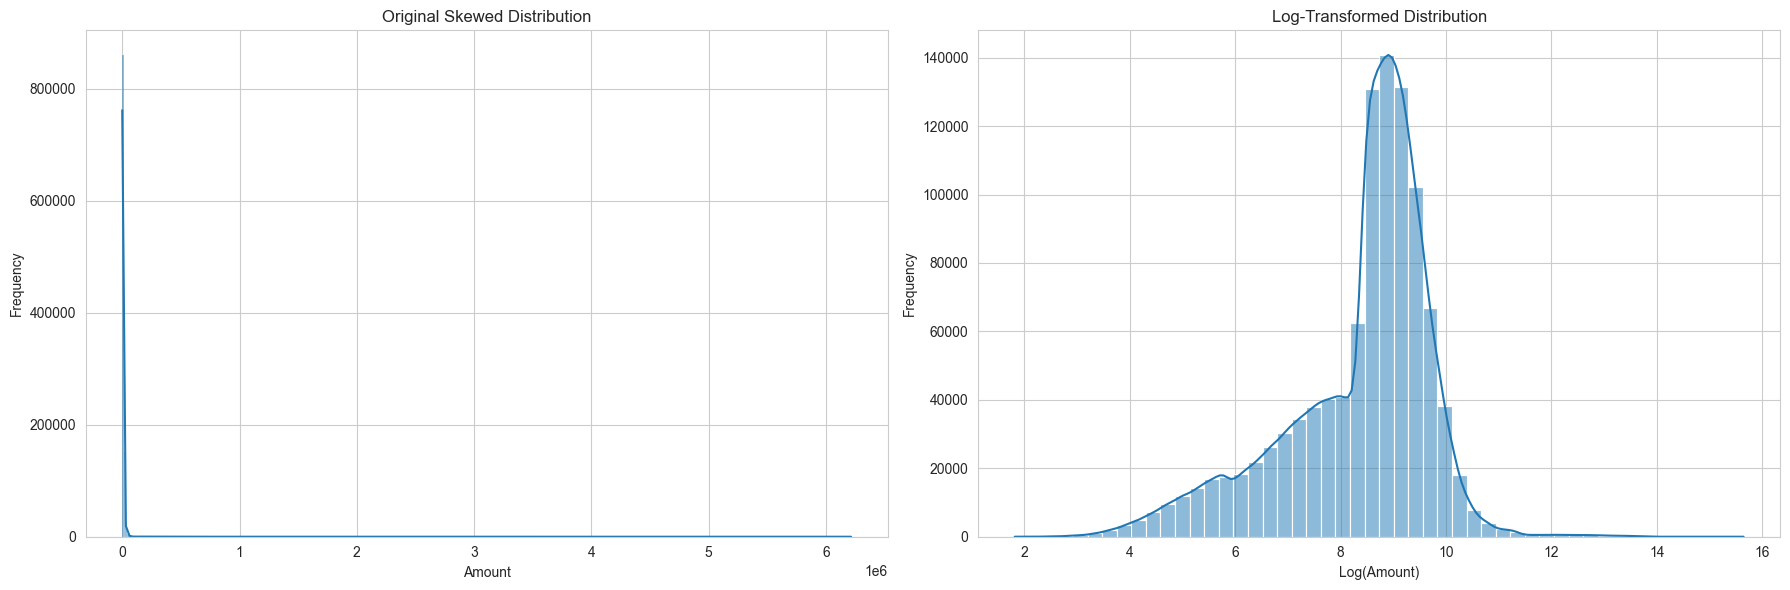

In [29]:
skewed_data = df['Amount']

original_skewness = skew(skewed_data)
print(f"Original Skewness: {original_skewness}")

# Apply a log transformation
log_transformed_data = np.log1p(skewed_data)
# skewness after log transformation
transformed_skewness = skew(log_transformed_data)
print(f"Log-Transformed Skewness: {transformed_skewness}")

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(skewed_data, bins=500, kde=True, ax=ax[0])
ax[0].set_title('Original Skewed Distribution')
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Frequency')

sns.histplot(log_transformed_data, bins=50, kde=True, ax=ax[1])
ax[1].set_title('Log-Transformed Distribution')
ax[1].set_xlabel('Log(Amount)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Plot the Payment Type Distribution for Laundering Cases

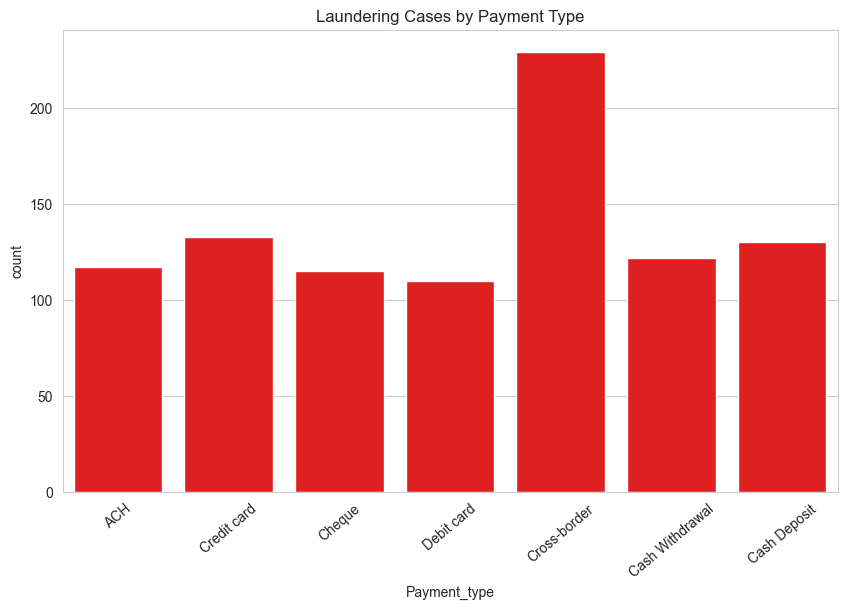

In [30]:
# Laundering Cases by Payment Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_type', data=df[df['Is_laundering'] == 1], color="red", order=df['Payment_type'].value_counts().index)
plt.title("Laundering Cases by Payment Type")
plt.xticks(rotation=40)
plt.show()

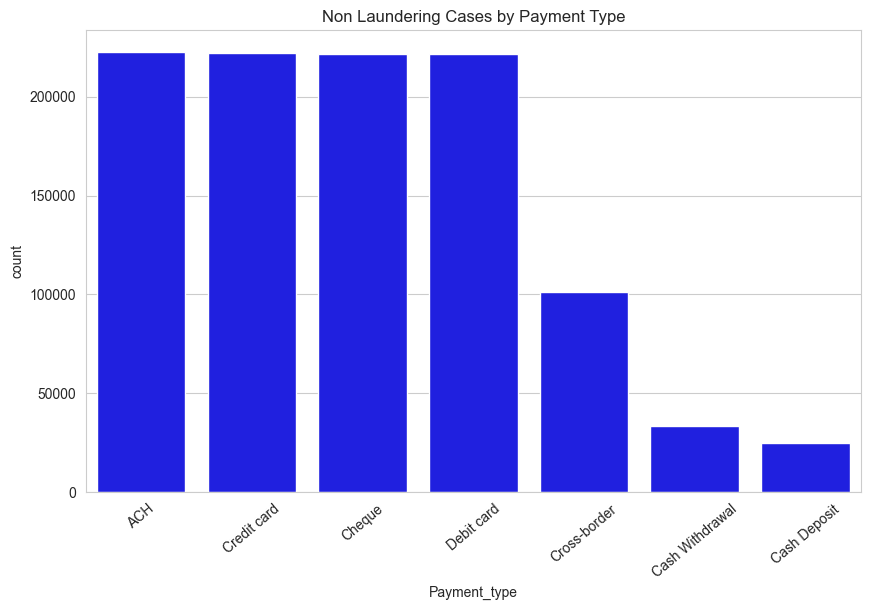

In [31]:
# Non Laundering Cases by Payment Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_type', data=df[df['Is_laundering'] == 0], color="blue", order=df['Payment_type'].value_counts().index)
plt.title("Non Laundering Cases by Payment Type")
plt.xticks(rotation=40)
plt.show()

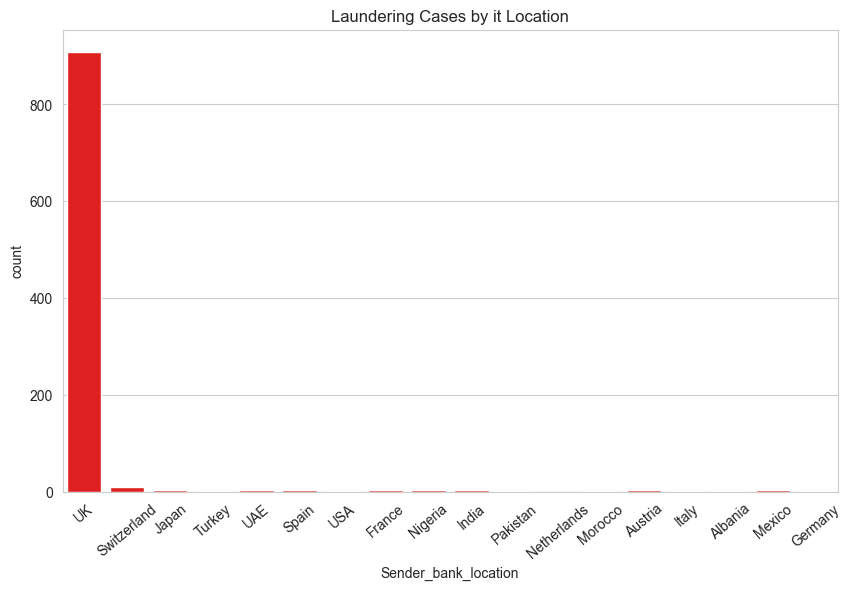

In [32]:
# Laundering Cases by it location
plt.figure(figsize=(10, 6))
sns.countplot(x='Sender_bank_location', data=df[df['Is_laundering'] == 1], color="red", order=df['Sender_bank_location'].value_counts().index)
plt.title("Laundering Cases by it Location")
plt.xticks(rotation=40)
plt.show()


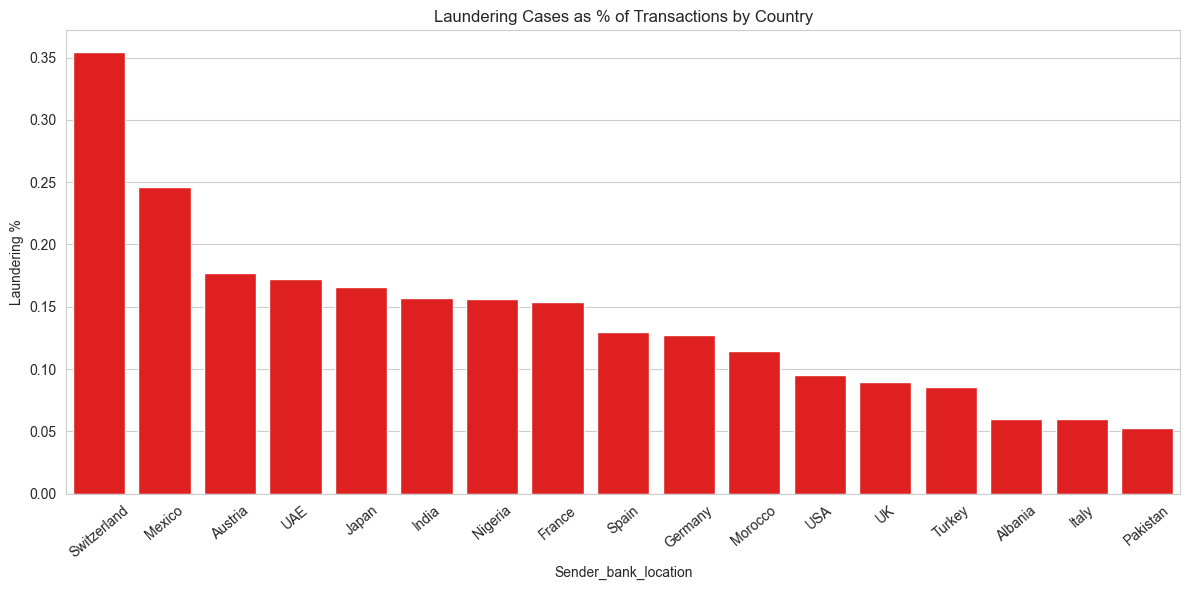

In [33]:

# Calculate the percentage of laundering cases per country
total_by_country = df['Sender_bank_location'].value_counts()
laundering_by_country = df[df['Is_laundering'] == 1]['Sender_bank_location'].value_counts()

# Calculate percentage
laundering_percentage = (laundering_by_country / total_by_country) * 100
laundering_percentage = laundering_percentage.dropna().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=laundering_percentage.index, y=laundering_percentage.values, color='red')
plt.title("Laundering Cases as % of Transactions by Country")
plt.ylabel("Laundering %")
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


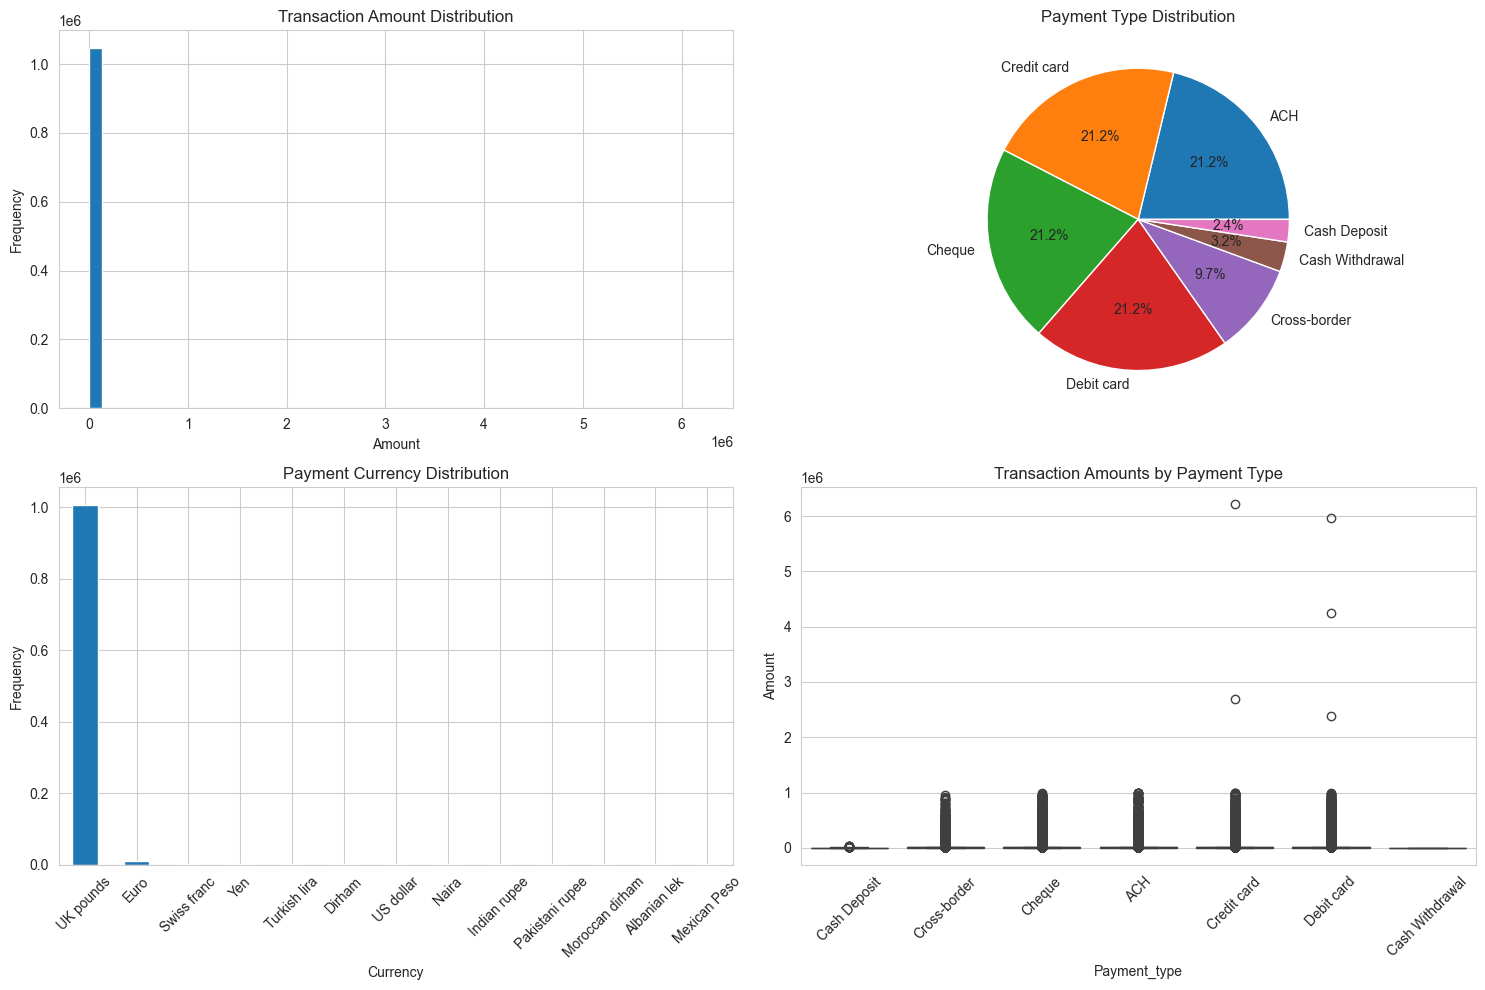

In [34]:
plt.figure(figsize=(15, 10))

# Transaction Amount Distribution (Histogram)
plt.subplot(2, 2, 1)
df['Amount'].hist(bins=50)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Payment Type Pie Chart
plt.subplot(2, 2, 2)
df['Payment_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Type Distribution')
plt.ylabel('') 

# Currency Distribution (Bar Chart)
plt.subplot(2, 2, 3)
df['Payment_currency'].value_counts().plot(kind='bar')
plt.title('Payment Currency Distribution')
plt.xticks(rotation=45)
plt.xlabel('Currency')
plt.ylabel('Frequency')

# Box Plot of Transaction Amounts by Payment Type
plt.subplot(2, 2, 4)
sns.boxplot(x='Payment_type', y='Amount', data=df)
plt.title('Transaction Amounts by Payment Type')
plt.xticks(rotation=45)

# Adjust the layout to ensure everything fits without overlap
plt.tight_layout()
plt.show()